# The notebook was created with the purpose of getting acquainted with distributions in mathematical statistics. We will work with various packages for data analysis and visualization.

In [202]:
import numpy as np
import scipy.stats as sts 
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm_notebook
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = 'ggplot'
plt.style.use('seaborn-v0_8-pastel')
sns.set_theme(style="ggplot")

# Discrete Distributions: Formulas and Properties

## Table of Contents
- [Bernoulli Distribution](##-1.-Bernoulli-Distribution)
- [Binomial Distribution](##-2.-Binomial-Distribution)
- [Geometric Distribution](##-3.-Geometric-Distribution)
- [Negative Binomial Distribution (Pascal Distribution)](##-4.-Negative-Binomial-Distribution-Pascal-Distribution)
- [Hypergeometric Distribution](##-5.-Hypergeometric-Distribution)
- [Poisson Distribution](##-6.-Poisson-Distribution)
- [Uniform Distribution](##-7.-Uniform-Distribution)
- [Normal Distribution](##-8.-Normal-Distribution)
- [Exponential Distribution](##-9.-Exponential-Distribution)
- [Lognormal Distribution](##-10.-Lognormal-Distribution)
- [Beta Distribution](##-11.-Beta-Distribution)
- [Chi-Squared Distribution](##-12.-Chi-squared-Distribution)
- [Student's t Distribution](##-13.-Students-t-Distribution)
- [Gamma Distribution](##-14.-Gamma-Distribution)
- [Pareto Distribution](##-15.-Pareto-Distribution)

---

## 1. Bernoulli Distribution

### Probability Mass Function 
$ P(X = x) = p^x (1 - p)^{1 - x}, \quad x \in \{0, 1\}, \quad 0 \leq p \leq 1 $

### Mean
$ E[X] = p $

### Variance
$ \text{Var}(X) = p(1 - p) $


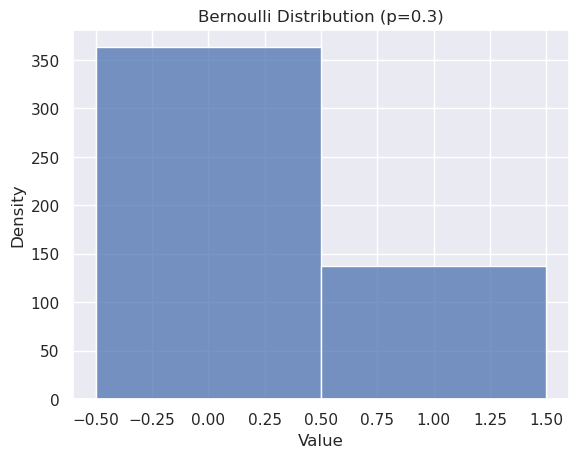

In [203]:
p = 0.3
bernoulli_sample = sts.bernoulli.rvs(p, size=500)

sns.histplot(bernoulli_sample, discrete=True, kde=False)
plt.title(f"Bernoulli Distribution (p={p})")
plt.xlabel("Value")
plt.ylabel("Density");

In [204]:
p_values = [0.1, 0.3, 0.5, 0.7, 0.9]
bernoulli_fig = go.Figure()
for p in p_values:
    bernoulli_fig.add_trace(
        go.Bar(x=[0, 1], y=sts.bernoulli.pmf([0, 1], p), name=f"p={p}")
        )
bernoulli_fig.update_layout(title="Bernoulli Distribution", xaxis_title="Value", yaxis_title="PMF", barmode="group")


---

## 2. Binomial Distribution

### Probability Mass Function 
$ P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}, \quad k \in \{0, 1, \dots, n\}, \quad 0 \leq p \leq 1 $

### Mean
$ E[X] = n \cdot p $

### Variance
$ \text{Var}(X) = n \cdot p \cdot (1 - p) $


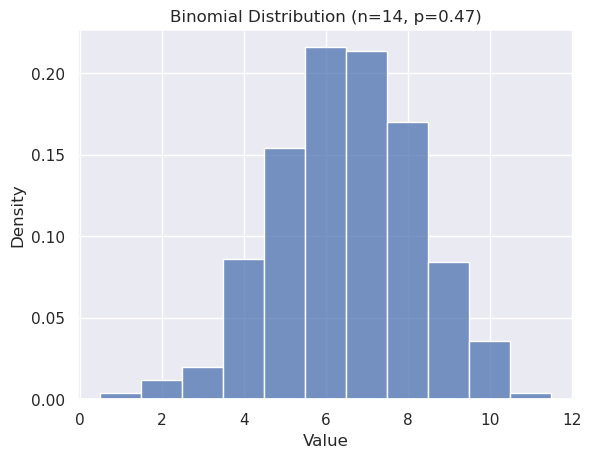

In [205]:
n, p = 14, 0.47
binom_sample = sts.binom.rvs(n, p, size=500)
sns.histplot(binom_sample, discrete=True, kde=False, stat="density")
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.xlabel("Value")
plt.ylabel("Density");

In [206]:
n = 70 
binomial_fig = go.Figure()
x = np.arange(0, n + 1)
for p in [0.2, 0.4, 0.6, 0.8]:
    binomial_fig.add_trace(
        go.Bar(x=x, y=sts.binom.pmf(x, n, p), name=f"p={p}")
        )
binomial_fig.update_layout(title="Binomial Distribution", xaxis_title="Value", yaxis_title="PMF", barmode="group")

---

## 3. Geometric Distribution

### Probability Mass Function 
$ P(X = k) = (1 - p)^{k - 1} p, \quad k \geq 1, \quad 0 < p \leq 1 $

### Mean
$ E[X] = \frac{1}{p} $

### Variance
$ \text{Var}(X) = \frac{1 - p}{p^2} $


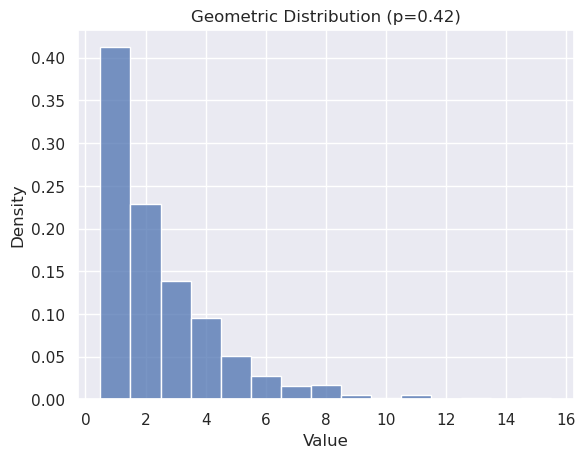

In [207]:
p = 0.42
geom_sample = sts.geom.rvs(p, size=1300)
sns.histplot(geom_sample, discrete=True, kde=False, stat="density")
plt.title(f"Geometric Distribution (p={p})")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [208]:
geom_fig = go.Figure()
x = np.arange(1, 20)
for p in [0.2, 0.4, 0.6, 0.8]:
    geom_fig.add_trace(
        go.Bar(x=x, y=sts.geom.pmf(x, p), name=f"p={p}")
        )
geom_fig.update_layout(title="Geometric Distribution", xaxis_title="Value", yaxis_title="PMF", barmode="group")

---

## 4. Negative Binomial Distribution (Pascal Distribution)

### Probability Mass Function 
$ P(X = k) = \binom{k + r - 1}{r - 1} p^r (1 - p)^k, \quad k \geq 0, \quad 0 < p \leq 1 $

### Mean
$ E[X] = r \cdot \frac{1 - p}{p} $

### Variance
$ \text{Var}(X) = r \cdot \frac{1 - p}{p^2} $


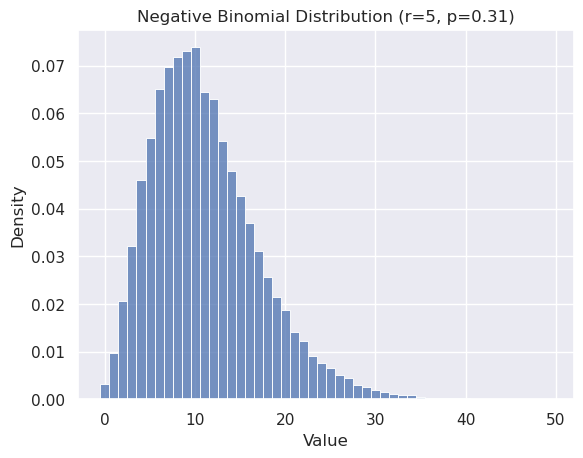

In [209]:
r, p = 5, 0.31
nbinom_sample = sts.nbinom.rvs(r, p, size=50000)
sns.histplot(nbinom_sample, discrete=True, kde=False, stat="density")
plt.title(f"Negative Binomial Distribution (r={r}, p={p})")
plt.xlabel("Value")
plt.ylabel("Density");

In [210]:
nbinom_fig = go.Figure()
x = np.arange(0, 40)
for r, p in [(5, 0.2), (6, 0.4), (7, 0.6), (5, 0.8)]:
    nbinom_fig.add_trace(
        go.Bar(x=x, y=sts.nbinom.pmf(x, r, p), name=f"r={r}, p={p}")
        )
nbinom_fig.update_layout(title="Negative Binomial Distribution", xaxis_title="Value", yaxis_title="PMF", barmode="group")

---

## 5. Hypergeometric Distribution

### Probability Mass Function 
$ P(X = k) = \frac{\binom{n}{k} \binom{N - n}{K - k}}{\binom{N}{K}}, \quad \max(0, K + n - N) \leq k \leq \min(n, K) $

### Mean
$ E[X] = n \cdot \frac{K}{N} $

### Variance
$ \text{Var}(X) = n \cdot \frac{K}{N} \cdot \frac{N - K}{N} \cdot \frac{N - n}{N - 1} $


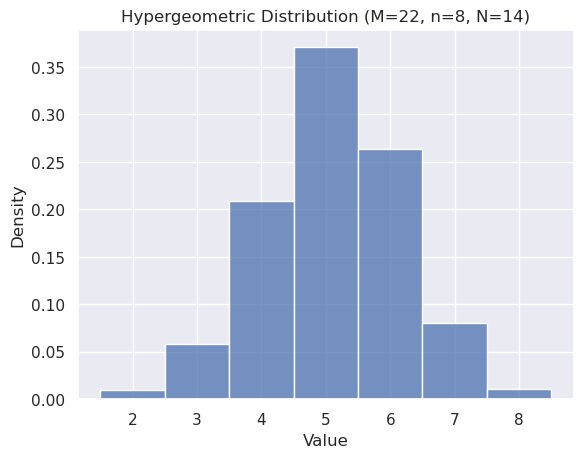

In [211]:
M, n, N = 22, 8, 14
hypergeom_sample = sts.hypergeom.rvs(M, n, N, size=1300)
sns.histplot(hypergeom_sample, discrete=True, kde=False, stat="density")
plt.title(f"Hypergeometric Distribution (M={M}, n={n}, N={N})")
plt.xlabel("Value")
plt.ylabel("Density");

In [212]:
hypergeom_fig = go.Figure()
x = np.arange(0, 13)
M, n = 22, 8
for N in [5, 10, 15]:
    hypergeom_fig.add_trace(
        go.Bar(x=x, y=sts.hypergeom.pmf(x, M, n, N), name=f"N={N}")
        )
hypergeom_fig.update_layout(title="Hypergeometric Distribution", xaxis_title="Value", yaxis_title="PMF", barmode="group")

---

## 6. Poisson Distribution

### Probability Mass Function 
$ P(X = k) = \frac{(\lambda)^k e^{-\lambda}}{k!}, \quad k \geq 0, \quad \lambda > 0 $

### Mean
$ E[X] = \lambda $

### Variance
$ \text{Var}(X) = \lambda  $


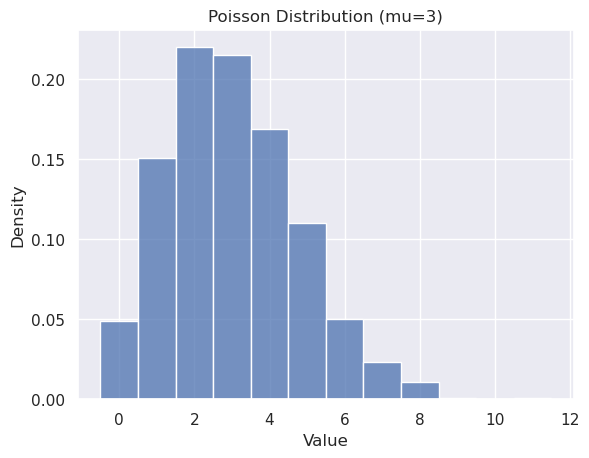

In [213]:
mu = 3
poisson_sample = sts.poisson.rvs(mu, size=1000)
sns.histplot(poisson_sample, discrete=True, kde=False, stat="density")
plt.title(f"Poisson Distribution (mu={mu})")
plt.xlabel("Value")
plt.ylabel("Density");

In [214]:
poisson_fig = go.Figure()
x = np.arange(0, 20)
for mu in [1, 3, 5, 7]:
    poisson_fig.add_trace(
        go.Bar(x=x, y=sts.poisson.pmf(x, mu), name=f"mu={mu}")
        )
poisson_fig.update_layout(title="Poisson Distribution", xaxis_title="Value", yaxis_title="PMF", barmode="group")

---

## 7. Uniform Distribution

- **Probability Density Function**:  
  $$
  f(x) = \frac{1}{b-a} \quad \text{for } a \leq x \leq b
  $$
- **Mean**:  
  $$
  \mu = \frac{a + b}{2}
  $$
- **Variance**:  
  $$
  \sigma^2 = \frac{(b - a)^2}{12}
  $$

## 8. Normal Distribution

- **Probability Density Function**:  
  $$
  f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
  $$
- **Mean**:  
  $$
  \mu = \mu
  $$
- **Variance**:  
  $$
  \sigma^2 = \sigma^2
  $$

## 9. Exponential Distribution

- **Probability Density Function**:  
  $$
  f(x) = \frac{1}{\lambda} e^{-\frac{x}{\lambda}} \quad \text{for } x \geq 0
  $$
- **Mean**:  
  $$
  \mu = \lambda
  $$
- **Variance**:  
  $$
  \sigma^2 = \lambda^2
  $$

## 10. Lognormal Distribution

- **Probability Density Function**:  
  $$
  f(x) = \frac{1}{x\sigma\sqrt{2\pi}} e^{-\frac{(\ln x - \mu)^2}{2\sigma^2}} \quad \text{for } x > 0
  $$
- **Mean**:  
  $$
  \mu = e^{\mu + \frac{\sigma^2}{2}}
  $$
- **Variance**:  
  $$
  \sigma^2 = (e^{\sigma^2} - 1) e^{2\mu + \sigma^2}
  $$

## 11. Beta Distribution

- **Probability Density Function**:  
  $$
  f(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)} \quad \text{for } 0 \leq x \leq 1
  $$
- **Mean**:  
  $$
  \mu = \frac{\alpha}{\alpha + \beta}
  $$
- **Variance**:  
  $$
  \sigma^2 = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}
  $$

## 12. Chi-Squared Distribution

- **Probability Density Function**:  
  $$
  f(x) = \frac{x^{\frac{d}{2}-1} e^{-\frac{x}{2}}}{2^{\frac{d}{2}} \Gamma\left(\frac{d}{2}\right)} \quad \text{for } x \geq 0
  $$
- **Mean**:  
  $$
  \mu = d
  $$
- **Variance**:  
  $$
  \sigma^2 = 2d
  $$

## 13. Student's t Distribution

- **Probability Density Function**:  
  $$
  f(x) = \frac{\Gamma\left(\frac{d+1}{2}\right)}{\sqrt{d\pi} \Gamma\left(\frac{d}{2}\right)} \left(1 + \frac{x^2}{d}\right)^{-\frac{d+1}{2}}
  $$
- **Mean**:  
  $$
  \mu = 0 \quad \text{(for } d > 1\text{)}
  $$
- **Variance**:  
  $$
  \sigma^2 = \frac{d}{d - 2} \quad \text{(for } d > 2\text{)}
  $$

## 14. Gamma Distribution

- **Probability Density Function**:  
  $$
  f(x) = \frac{x^{k-1} e^{-\frac{x}{\theta}}}{\theta^k \Gamma(k)} \quad \text{for } x \geq 0
  $$
- **Mean**:  
  $$
  \mu = k\theta
  $$
- **Variance**:  
  $$
  \sigma^2 = k\theta^2
  $$

## 15. Pareto Distribution

- **Probability Density Function**:  
  $$
  f(x) = \frac{\alpha x_m^\alpha}{x^{\alpha+1}} \quad \text{for } x \geq x_m
  $$
- **Mean**:  
  $$
  \mu = \frac{\alpha x_m}{\alpha - 1} \quad \text{(for } \alpha > 1\text{)}
  $$
- **Variance**:  
  $$
  \sigma^2 = \frac{\alpha x_m^2}{(\alpha - 1)^2 (\alpha - 2)} \quad \text{(for } \alpha > 2\text{)}
  $$

In [234]:

def plot_distribution(dist_name, params_list):
    fig = go.Figure()
    x = np.linspace(-5, 5, 1000) 
    
    match dist_name:   
        case "Uniform":
            x = np.linspace(-5, 5, 1000)
            for loc, scale in params_list:
                y = sts.uniform.pdf(x, loc=loc, scale=scale)
                fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f'Loc={loc}, Scale={scale}', line=dict(width=3)))
    
        case "Normal":
            for mean, std in params_list:
                y = sts.norm.pdf(x, loc=mean, scale=std)
                fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f'Mean={mean}, Std={std}', line=dict(width=3)))

        case "Exponential":
            for scale in params_list:
                y = sts.expon.pdf(x, scale=scale)
                fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f'Scale={scale}', line=dict(width=3)))

        case "Lognormal":
            for s, scale in params_list:
                y = sts.lognorm.pdf(x, s, scale=scale)
                fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f's={s}, scale={scale}', line=dict(width=3)))

        case "Beta":
            x = np.linspace(0, 1, 1000)
            for a, b in params_list:
                y = sts.beta.pdf(x, a, b)
                fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f'a={a}, b={b}', line=dict(width=3)))

        case "Chi-Squared":
            for df in params_list:
                y = sts.chi2.pdf(x, df=df)
                fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f'df={df}', line=dict(width=3)))

        case"Student's t":
            for df in params_list:
                y = sts.t.pdf(x, df=df)
                fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f'df={df}', line=dict(width=3)))

        case "Gamma":
            for shape, scale in params_list:
                y = sts.gamma.pdf(x, shape, scale=scale)
                fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f'Shape={shape}, Scale={scale}', line=dict(width=3)))

        case "Pareto":
            for shape, scale in params_list:
                y = sts.pareto.pdf(x, shape, scale=scale)
                fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f'Shape={shape}, Scale={scale}', line=dict(width=3)))
        
        case _:
            print(f"Unsupported distribution: {dist_name}")

    fig.update_layout(
        title=f"{dist_name} Distribution",
        xaxis_title="x",
        yaxis_title="Density",
        showlegend=True,
        template="plotly_dark",
        plot_bgcolor='rgba(0, 0, 0, 0)',  
        legend=dict(title="Parameters", orientation="h", y=-0.1, x=0.5, xanchor="center"),
        margin=dict(t=40, b=40, l=40, r=40)
    )
    
    return fig

dist_parametrs = {
    "Uniform": [(-5, 10), (0, 1), (-3, 5)],
    "Normal": [(0, 1), (1, 2), (0, 0.5)],
    "Exponential": [1, 2, 3, 4],
    "Lognormal": [(0.5, 1), (1, 2), (1.5, 0.5)],
    "Beta": [(2, 5), (1, 2), (3, 2)],
    "Chi-Squared": [2, 4, 6, 8],
    "Student's t": [1, 3, 10],
    "Gamma": [(2, 2), (3, 1), (4, 0.5)],
    "Pareto": [(2, 1), (3, 1.5), (2.5, 2)]
}

dist_list = [
    "Uniform", "Normal", "Exponential", "Lognormal", 
    "Beta", "Chi-Squared", "Student's t", "Gamma", "Pareto"
]

for dist_name in dist_list:
    params_list = dist_parametrs[dist_name]
    fig = plot_distribution(dist_name, params_list)
    fig.show() 
